<b>Prepare a classification model using SVM for salary data 

<b>Data Description:

age -- age of a person
workclass	-- A work class is a grouping of work 
education	-- Education of an individuals	
maritalstatus -- Marital status of an individulas	
occupation	 -- occupation of an individuals
relationship -- 	
race --  Race of an Individual
sex --  Gender of an Individual
capitalgain --  profit received from the sale of an investment	
capitalloss	-- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week	
native -- Native of an individual
Salary -- salary of an individual


In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid')

In [77]:
train_data = pd.read_csv(r'D:\Excelr Data Science assignment\Support Vector machine\SalaryData_Train(1).csv')

In [78]:
test_data = pd.read_csv(r'D:\Excelr Data Science assignment\Support Vector machine\SalaryData_Test(1).csv')

In [79]:
train_data.tail()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
30160,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [80]:
test_data.tail()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K
15059,35,Self-emp-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K


<b>EDA

In [81]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [82]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [83]:
print('Train Data Shape : ',train_data.shape)
print('Test Data Shape : ' ,test_data.shape)

Train Data Shape :  (30161, 14)
Test Data Shape :  (15060, 14)


In [84]:
train_data.describe(include='all')

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
count,30161.000000,30161,30161,30161.000000,30161,30161,30161,30161,30161,30161.000000,30161.000000,30161.000000,30161,30161
unique,NaN,7,16,NaN,7,14,6,5,2,NaN,NaN,NaN,40,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22285,9840,NaN,14065,4038,12463,25932,20380,NaN,NaN,NaN,27504,22653
mean,38.438115,NaN,NaN,10.121316,NaN,NaN,NaN,NaN,NaN,1092.044064,88.302311,40.931269,NaN,NaN
std,13.134830,NaN,NaN,2.550037,NaN,NaN,NaN,NaN,NaN,7406.466611,404.121321,11.980182,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [85]:
test_data.describe(include='all')

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
count,15060.000000,15060,15060,15060.000000,15060,15060,15060,15060,15060,15060.000000,15060.000000,15060.000000,15060,15060
unique,NaN,7,16,NaN,7,14,6,5,2,NaN,NaN,NaN,40,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Exec-managerial,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,11021,4943,NaN,6990,1992,6203,12970,10147,NaN,NaN,NaN,13788,11360
mean,38.768327,NaN,NaN,10.112749,NaN,NaN,NaN,NaN,NaN,1120.301594,89.041899,40.951594,NaN,NaN
std,13.380676,NaN,NaN,2.558727,NaN,NaN,NaN,NaN,NaN,7703.181842,406.283245,12.062831,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [86]:
train_data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [87]:
test_data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

C:\Users\CSC\AppData\Local\Temp\ipykernel_1252\356364196.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot=True,cmap='Set2')


<Axes: >

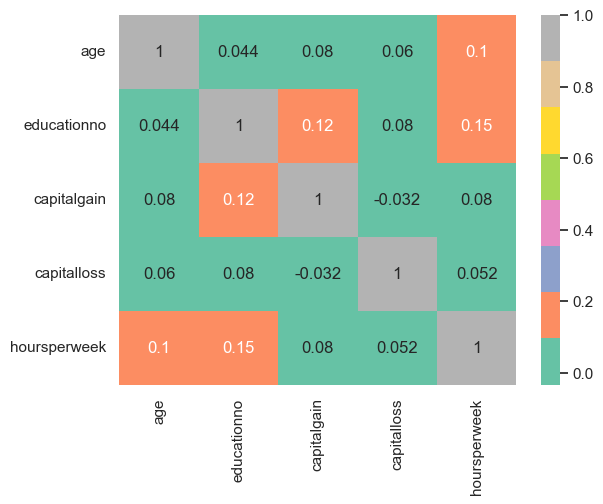

In [88]:
sns.heatmap(train_data.corr(),annot=True,cmap='Set2')

C:\Users\CSC\AppData\Local\Temp\ipykernel_1252\1207857391.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(test_data.corr(),annot=True,cmap='tab10')


<Axes: >

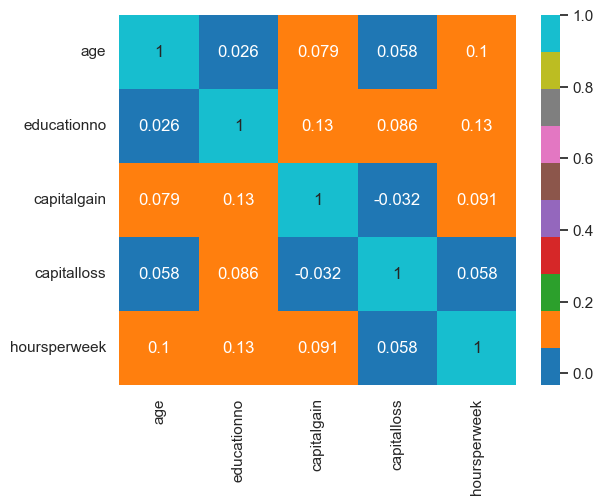

In [89]:
sns.heatmap(test_data.corr(),annot=True,cmap='tab10')

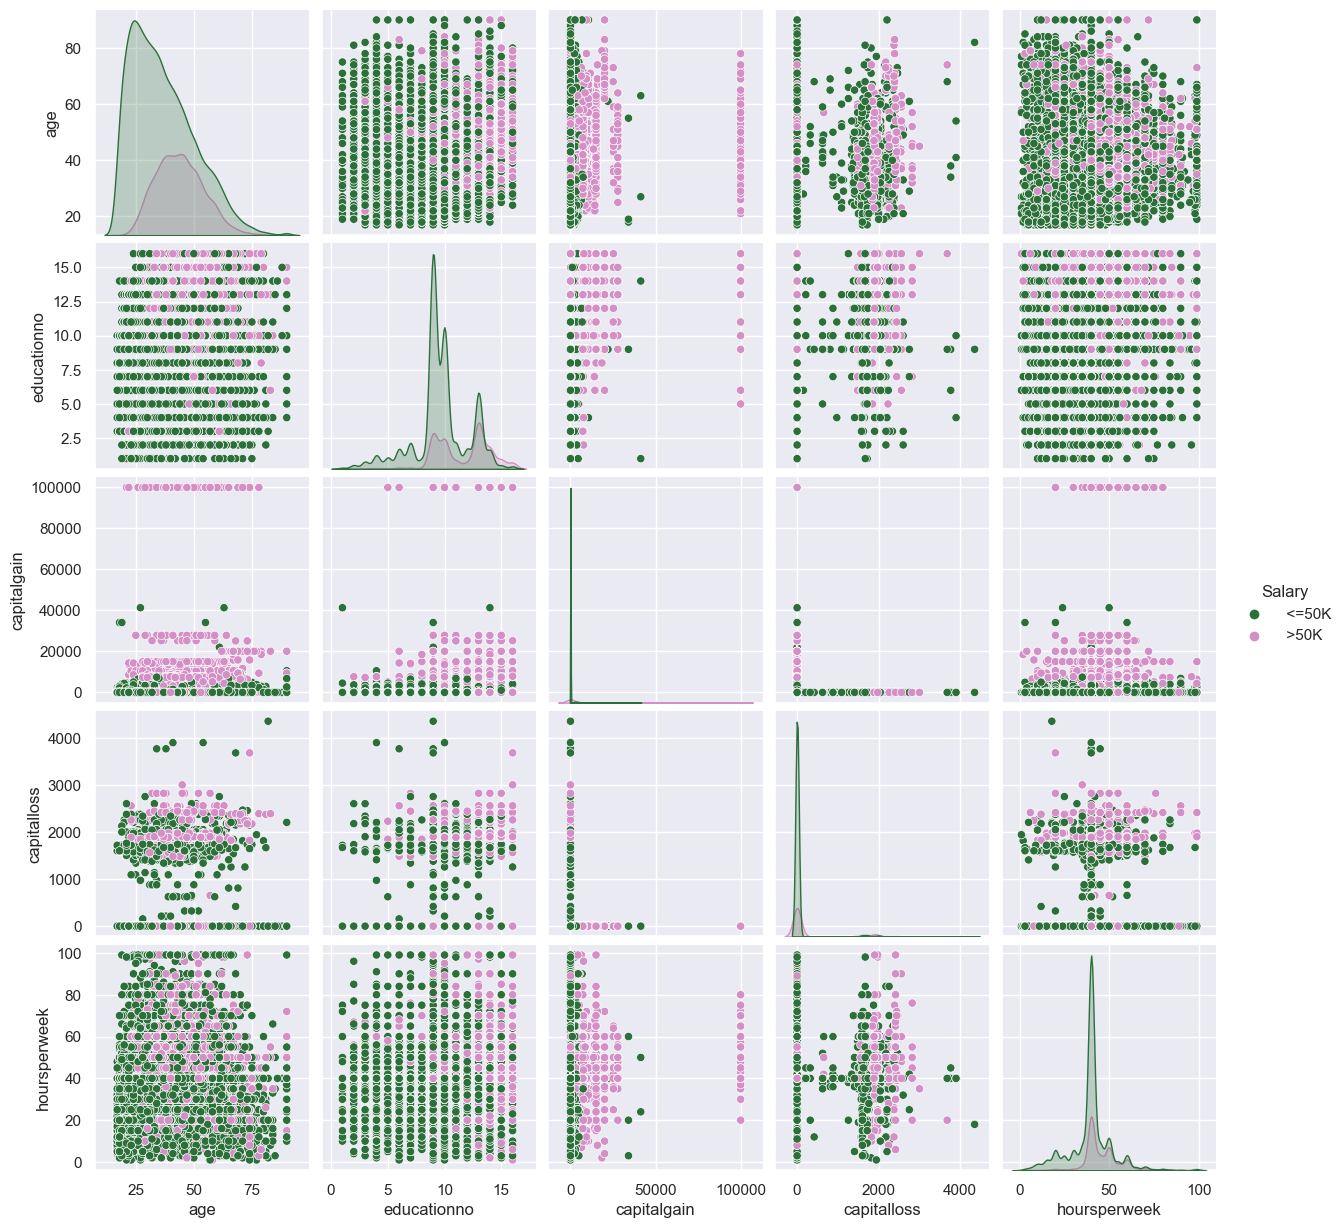

In [90]:
sns.pairplot(train_data,hue='Salary',palette='cubehelix')

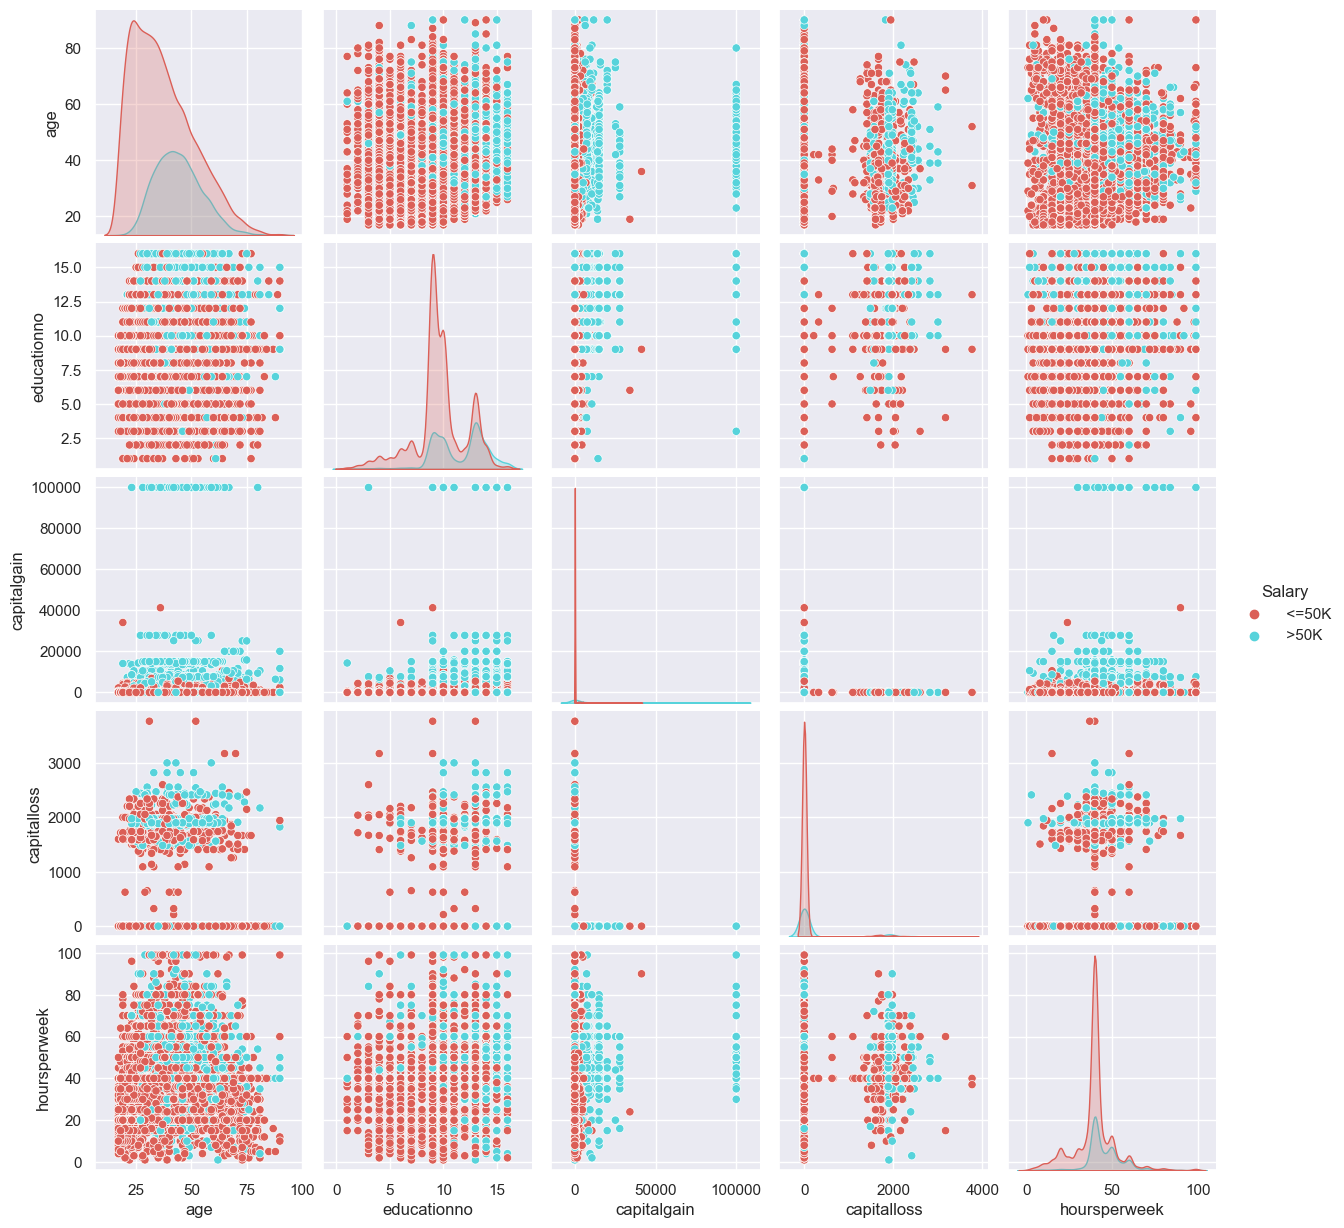

In [91]:
sns.pairplot(test_data,hue='Salary',palette='hls')

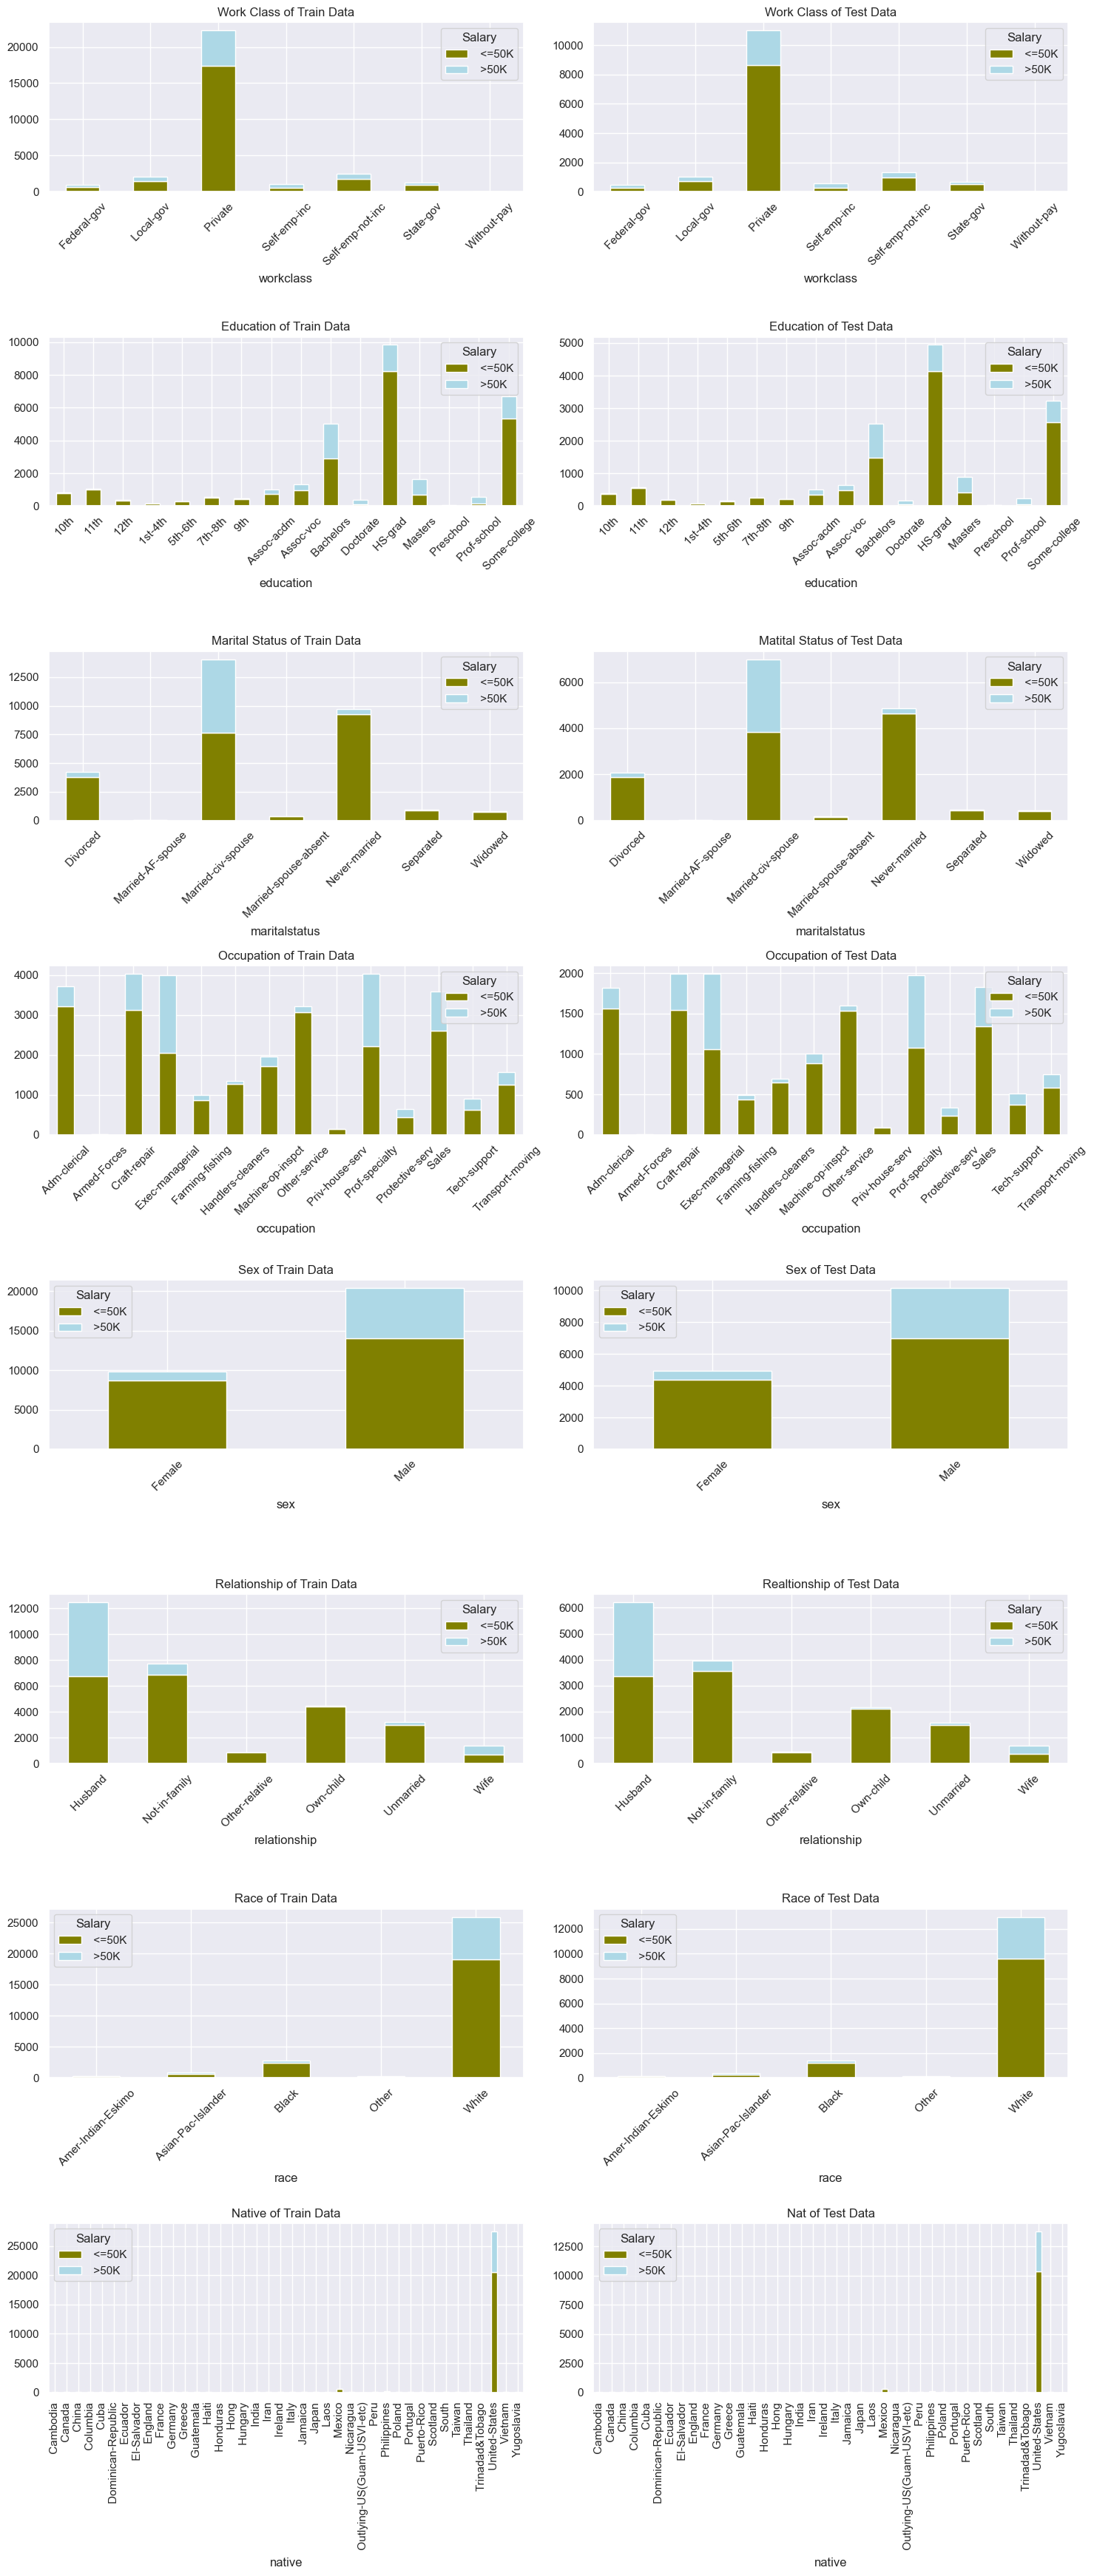

In [92]:
colors = ['olive','lightblue']
fig , ax = plt.subplots(figsize=(15,35),nrows=8,ncols=2)

pd.crosstab(train_data['workclass'],train_data['Salary']).plot(kind='bar',stacked=True,color=colors,ax=ax[0,0])
ax[0,0].set_title("Work Class of Train Data")
ax[0,0].tick_params(axis='x',rotation=45)

pd.crosstab(test_data['workclass'],test_data['Salary']).plot(kind='bar',stacked=True,color=colors,ax=ax[0,1])
ax[0,1].set_title("Work Class of Test Data")
ax[0,1].tick_params(axis='x',rotation=45)

pd.crosstab(train_data['education'],train_data['Salary']).plot(kind='bar',stacked=True,color=colors,ax=ax[1,0])
ax[1,0].set_title("Education of Train Data")
ax[1,0].tick_params(axis='x',rotation=45)

pd.crosstab(test_data['education'],test_data['Salary']).plot(kind='bar',stacked=True,color=colors,ax=ax[1,1])
ax[1,1].set_title("Education of Test Data")
ax[1,1].tick_params(axis='x',rotation=45)

pd.crosstab(train_data['maritalstatus'],train_data['Salary']).plot(kind='bar',stacked=True,color=colors,ax=ax[2,0])
ax[2,0].set_title("Marital Status of Train Data")
ax[2,0].tick_params(axis='x',rotation=45)

pd.crosstab(test_data['maritalstatus'],test_data['Salary']).plot(kind='bar',stacked=True,color=colors,ax=ax[2,1])
ax[2,1].set_title("Matital Status of Test Data")
ax[2,1].tick_params(axis='x',rotation=45)

pd.crosstab(train_data['occupation'],train_data['Salary']).plot(kind='bar',stacked=True,color=colors,ax=ax[3,0])
ax[3,0].set_title("Occupation of Train Data")
ax[3,0].tick_params(axis='x',rotation=45)

pd.crosstab(test_data['occupation'],test_data['Salary']).plot(kind='bar',stacked=True,color=colors,ax=ax[3,1])
ax[3,1].set_title("Occupation of Test Data")
ax[3,1].tick_params(axis='x',rotation=45)

pd.crosstab(train_data['sex'],train_data['Salary']).plot(kind='bar',stacked=True,color=colors,ax=ax[4,0])
ax[4,0].set_title("Sex of Train Data")
ax[4,0].tick_params(axis='x',rotation=45)

pd.crosstab(test_data['sex'],test_data['Salary']).plot(kind='bar',stacked=True,color=colors,ax=ax[4,1])
ax[4,1].set_title("Sex of Test Data")
ax[4,1].tick_params(axis='x',rotation=45)

pd.crosstab(train_data['relationship'],train_data['Salary']).plot(kind='bar',stacked=True,color=colors,ax=ax[5,0])
ax[5,0].set_title('Relationship of Train Data')
ax[5,0].tick_params(axis='x',rotation=45)

pd.crosstab(test_data['relationship'],test_data['Salary']).plot(kind='bar',stacked='True',color=colors,ax=ax[5,1])
ax[5,1].set_title('Realtionship of Test Data')
ax[5,1].tick_params(axis='x',rotation=45)

pd.crosstab(train_data['race'],train_data['Salary']).plot(kind='bar',stacked=True,color=colors,ax=ax[6,0])
ax[6,0].set_title('Race of Train Data')
ax[6,0].tick_params(axis='x',rotation=45)

pd.crosstab(test_data['race'],test_data['Salary']).plot(kind='bar',stacked='True',color=colors,ax=ax[6,1])
ax[6,1].set_title('Race of Test Data')
ax[6,1].tick_params(axis='x',rotation=45)

pd.crosstab(train_data['native'],train_data['Salary']).plot(kind='bar',stacked=True,color=colors,ax=ax[7,0])
ax[7,0].set_title('Native of Train Data')
ax[7,0].tick_params(axis='x',rotation=90)

pd.crosstab(test_data['native'],test_data['Salary']).plot(kind='bar',stacked='True',color=colors,ax=ax[7,1])
ax[7,1].set_title('Nat of Test Data')
ax[7,1].tick_params(axis='x',rotation=90)

plt.tight_layout()

In [93]:
print('Train Data Salary Value Counts : ','\n',train_data['Salary'].value_counts())
print('================================================================================')
print('Test Data Salary Value Counts : ','\n',test_data['Salary'].value_counts())

Train Data Salary Value Counts :  
  <=50K    22653
 >50K      7508
Name: Salary, dtype: int64
Test Data Salary Value Counts :  
  <=50K    11360
 >50K      3700
Name: Salary, dtype: int64


<b>DATA PREPROCESSING

In [94]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
train_enc = enc.fit_transform(train_data[['workclass','education','maritalstatus','occupation','relationship','race','sex','native']]).toarray()
test_enc = enc.fit_transform(test_data[['workclass','education','maritalstatus','occupation','relationship','race','sex','native']]).toarray()

train_enc_1 = pd.DataFrame(train_enc,columns=enc.get_feature_names_out(['workclass','education','maritalstatus','occupation','relationship','race','sex','native']))

test_enc_1 = pd.DataFrame(test_enc,columns=enc.get_feature_names_out(['workclass','education','maritalstatus','occupation','relationship','race','sex','native']))                           

In [95]:
train_enc_1

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30157,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30158,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30159,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [96]:
test_enc_1

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15056,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15057,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15058,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [97]:
train_data_2 = train_data.drop(['workclass','education','maritalstatus','occupation','relationship','race','sex','native'],axis=1)
test_data_2 = test_data.drop(['workclass','education','maritalstatus','occupation','relationship','race','sex','native'],axis=1)
print('Train Data Shape : ',train_data_2.shape)
print('Test Data Shape : ' ,test_data_2.shape)

Train Data Shape :  (30161, 6)
Test Data Shape :  (15060, 6)


In [98]:
train_data_3 = pd.concat([train_data_2,train_enc_1],axis=1)
test_data_3 = pd.concat([test_data_2,test_enc_1],axis=1)
print('Train Data Shape : ',train_data_3.shape)
print('Test Data Shape : ' ,test_data_3.shape)

Train Data Shape :  (30161, 103)
Test Data Shape :  (15060, 103)


<b>X and Y 

In [99]:
x_train = train_data_3.drop(['Salary'],axis=1)
y_train = train_data_3['Salary']
x_test = test_data_3.drop(['Salary'],axis=1)
y_test = test_data_3['Salary']
print('X Train Shape : ',x_train.shape)
print('Y Train Shape : ',y_train.shape)
print('X Test Shape : ',x_test.shape)
print('Y Test Shape : ',y_test.shape)

X Train Shape :  (30161, 102)
Y Train Shape :  (30161,)
X Test Shape :  (15060, 102)
Y Test Shape :  (15060,)


In [100]:
#Let Standardize the data for better results,
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.fit_transform(x_test)

print('X Train Shape : ',x_train_scaled.shape)
print('X Test Shape : ',x_test_scaled.shape)

X Train Shape :  (30161, 102)
X Test Shape :  (15060, 102)


<b>MODEL BUILDING

In [101]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [102]:
#Model 1 ---- Kernel = 'rbf'
model_1 = SVC(kernel='rbf')
model_1.fit(x_train_scaled,y_train)
y_pred_1 = model_1.predict(x_test_scaled)
print(y_pred_1)
print('====================================================================================================')
print('Confusion_Matrix: ','\n',confusion_matrix(y_test,y_pred_1))
print('====================================================================================================')
print('Classification_Report: ','\n',classification_report(y_test,y_pred_1))

[' <=50K' ' <=50K' ' >50K' ... ' >50K' ' <=50K' ' >50K']
Confusion_Matrix:  
 [[10601   759]
 [ 1560  2140]]
Classification_Report:  
               precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90     11360
        >50K       0.74      0.58      0.65      3700

    accuracy                           0.85     15060
   macro avg       0.80      0.76      0.77     15060
weighted avg       0.84      0.85      0.84     15060



In [103]:
#Model 2 ---- Kernel = 'linear'
model_2 = SVC(kernel='linear')
model_2.fit(x_train_scaled,y_train)
y_pred_2 = model_2.predict(x_test_scaled)
print(y_pred_2)
print('====================================================================================================')
print('Confusion_Matrix: ','\n',confusion_matrix(y_test,y_pred_2))
print('====================================================================================================')
print('Classification_Report: ','\n',classification_report(y_test,y_pred_2))

[' <=50K' ' <=50K' ' <=50K' ... ' >50K' ' >50K' ' >50K']
Confusion_Matrix:  
 [[10607   753]
 [ 1554  2146]]
Classification_Report:  
               precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90     11360
        >50K       0.74      0.58      0.65      3700

    accuracy                           0.85     15060
   macro avg       0.81      0.76      0.78     15060
weighted avg       0.84      0.85      0.84     15060



In [104]:
#Model 3 ---- Kernel = 'poly'
model_3 = SVC(kernel='poly')
model_3.fit(x_train_scaled,y_train)
y_pred_3 = model_3.predict(x_test_scaled)
print(y_pred_3)
print('====================================================================================================')
print('Confusion_Matrix: ','\n',confusion_matrix(y_test,y_pred_3))
print('====================================================================================================')
print('Classification_Report: ','\n',classification_report(y_test,y_pred_3))

[' <=50K' ' <=50K' ' >50K' ... ' >50K' ' <=50K' ' >50K']
Confusion_Matrix:  
 [[10635   725]
 [ 1830  1870]]
Classification_Report:  
               precision    recall  f1-score   support

       <=50K       0.85      0.94      0.89     11360
        >50K       0.72      0.51      0.59      3700

    accuracy                           0.83     15060
   macro avg       0.79      0.72      0.74     15060
weighted avg       0.82      0.83      0.82     15060



In [105]:
#Model 4 ---- Kernel = 'sigmoid'
model_4 = SVC(kernel='sigmoid')
model_4.fit(x_train_scaled,y_train)
y_pred_4 = model_4.predict(x_test_scaled)
print(y_pred_4)
print('====================================================================================================')
print('Confusion_Matrix: ','\n',confusion_matrix(y_test,y_pred_4))
print('====================================================================================================')
print('Classification_Report: ','\n',classification_report(y_test,y_pred_4))

[' <=50K' ' <=50K' ' <=50K' ... ' >50K' ' >50K' ' >50K']
Confusion_Matrix:  
 [[10216  1144]
 [ 1617  2083]]
Classification_Report:  
               precision    recall  f1-score   support

       <=50K       0.86      0.90      0.88     11360
        >50K       0.65      0.56      0.60      3700

    accuracy                           0.82     15060
   macro avg       0.75      0.73      0.74     15060
weighted avg       0.81      0.82      0.81     15060



<b>Model 1 and Model 2 are better comparitively but still the minority class predictions are not that impressive

<b>Hyper Parameter tuning

In [113]:
#Since data points are large let us perform a RamdomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
mod = SVC()
param_grid = {'kernel':['linear','rbf'],'C': np.arange(1,10),'gamma':['scale','auto']}
random_search = RandomizedSearchCV(mod,param_grid,cv=5,scoring='accuracy',n_jobs=-1)

In [114]:
random_search.fit(x_train_scaled,y_train)

RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf']},
                   scoring='accuracy')

In [115]:
random_search.best_score_

0.8465570111513114

In [116]:
random_search.best_estimator_

SVC(C=1, gamma='auto', kernel='linear')

In [117]:
y_p = random_search.predict(x_test_scaled)
accuracy_score(y_test,y_p)

0.8468127490039841

In [118]:
#Building Model with Best estimators from RamdomSearchCV
model_5 = SVC(kernel='linear',C=1,gamma='auto')
model_5.fit(x_train_scaled,y_train)
y_pred_5 = model_5.predict(x_test_scaled)
print(y_pred_5)
print('====================================================================================================')
print('Confusion_Matrix: ','\n',confusion_matrix(y_test,y_pred_5))
print('====================================================================================================')
print('Classification_Report: ','\n',classification_report(y_test,y_pred_5))

[' <=50K' ' <=50K' ' <=50K' ... ' >50K' ' >50K' ' >50K']
Confusion_Matrix:  
 [[10607   753]
 [ 1554  2146]]
Classification_Report:  
               precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90     11360
        >50K       0.74      0.58      0.65      3700

    accuracy                           0.85     15060
   macro avg       0.81      0.76      0.78     15060
weighted avg       0.84      0.85      0.84     15060



<b>There is no significant improvement in results

In [122]:
#Let us try Bagging Techinque with SVC as base_estimator
from sklearn.ensemble import BaggingClassifier
svc_bag = SVC(kernel='linear',C=1,gamma='auto')
bag_cla = BaggingClassifier(estimator=svc_bag,n_estimators=10,random_state=201)
bag_cla.fit(x_train_scaled,y_train)
y_pred_bag = bag_cla.predict(x_test_scaled)
print(y_pred_bag)
print('====================================================================================================')
print('Confusion_Matrix: ','\n',confusion_matrix(y_test,y_pred_bag))
print('====================================================================================================')
print('Classification_Report: ','\n',classification_report(y_test,y_pred_bag))

[' <=50K' ' <=50K' ' <=50K' ... ' >50K' ' <=50K' ' >50K']
Confusion_Matrix:  
 [[10615   745]
 [ 1580  2120]]
Classification_Report:  
               precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90     11360
        >50K       0.74      0.57      0.65      3700

    accuracy                           0.85     15060
   macro avg       0.81      0.75      0.77     15060
weighted avg       0.84      0.85      0.84     15060



<b>There is no significant improvement in bagging classifier too

<b>Conclusion:<br>

<b>Model_2 with Kernel='linear' , C=1 and gamma = 'auto' can be selected as our final model

In [141]:
#Learning Curve for Selected Model
from sklearn.model_selection import learning_curve
train_size,train_score,valid_score = learning_curve(model_2,x_train_scaled,y_train,train_sizes=np.linspace(0.1,1,10),cv=5,scoring='accuracy',n_jobs=-1)

train_mean = np.mean(train_score,axis=1)
train_std = np.std(train_score,axis=1)
valid_mean = np.mean(valid_score,axis=1)
valid_std = np.std(valid_score,axis=1)

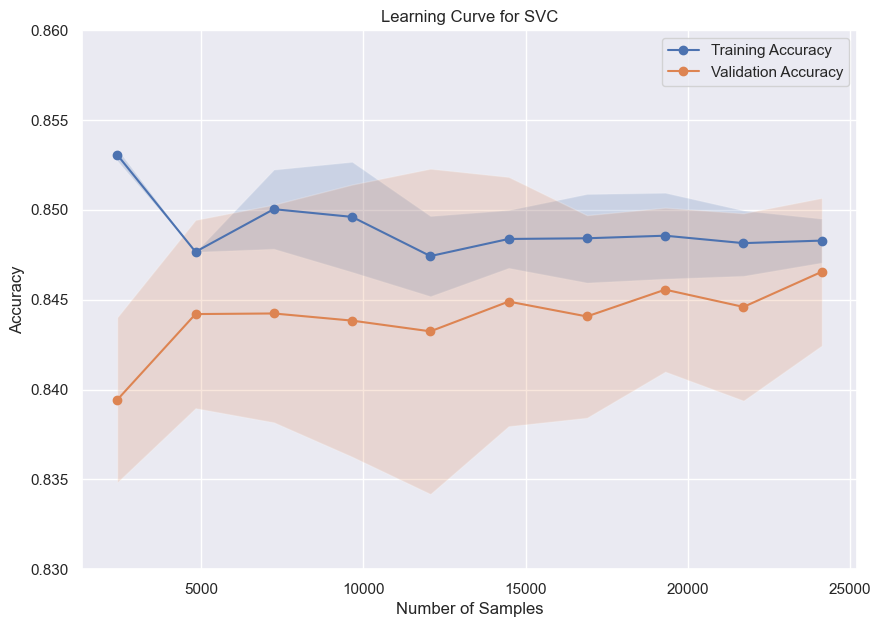

In [147]:
#Learning Curve plot
plt.figure(figsize=(10,7))
plt.plot(train_size,train_mean,marker='o',label='Training Accuracy')
plt.fill_between(train_size,train_mean-train_std,train_mean+train_std,alpha=0.2)
plt.plot(train_size,valid_mean,label='Validation Accuracy',marker='o')
plt.fill_between(train_size,valid_mean-valid_std,valid_mean+valid_std,alpha=0.2)
plt.xlabel('Number of Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve for SVC')
plt.ylim(0.83,0.86)
plt.legend(loc='best')
plt.show();

<b>Taining accuracy converges with the Validation accuracy as the number of samples increases, Leaning rate is quite constant with less variation along the plot, which is a good sign.